In [1]:
import pandas as pd
import numpy as np
import re
import pickle
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# create feature vector with Countvectorize by sklearn library
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import joblib
import matplotlib.pyplot as plt

In [2]:
# load data
df_data = pd.ExcelFile('data_name_gender_40k.xlsx').parse('Sheet1', encoding= 'utf-8')
df_data.shape

(38233, 2)

In [3]:
df_data.head(2)

,name,Gender
0,nguyễn dương ngọc thùy dung,female
1,trần thị ngọc diệu,female


[0 1]
[50.37533021 49.62466979]


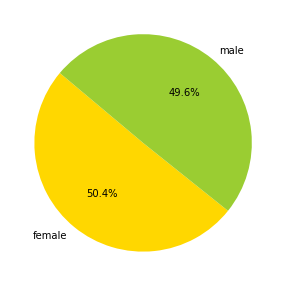

In [4]:
df_count_target = df_data.Gender.value_counts()
# target distribution
target = np.array(df_count_target.index)
labels = np.arange(len(target))
sizes = np.array((df_count_target/df_count_target.sum())*100)
colors = ['gold', 'yellowgreen']
print(labels)
print(sizes)
plt.figure(figsize= (10,5))
plt.pie(sizes, labels=target, colors=colors, startangle=140, autopct='%.1f%%')
#plt.legend( target, loc= "best")
plt.show()

# data analysis and normalize

In [5]:
# find and process noise in data

In [6]:
def count_word(name):
    '''
    count the word number in the name 
    '''
    name = name.strip()
    return len(name.split())
df_data['count_word'] = df_data.name.apply(count_word)

In [7]:
import pickle
from sklearn.externals import joblib
def predict_gender(text):
    # load feature text model
    vectorize = joblib.load('vectorizer_bow')
    vec_text = vectorize.transform([text])
    # load model
    model = joblib.load('logistic_BOW_logistic')
    y_pred = model.predict(vec_text)
    return y_pred[-1]

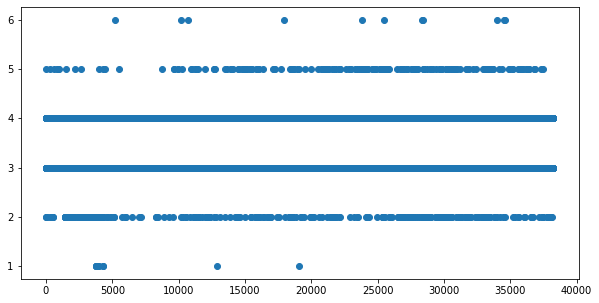

In [8]:
plt.figure(figsize= (10, 5))
plt.scatter(df_data.index, df_data.count_word)
plt.show()

In [9]:
df_word_num = df_data.count_word.value_counts().to_frame()
df_word_num = df_word_num.reset_index()
df_word_num.columns = ['word_number', 'count_word']
df_word_num = df_word_num.sort_values(by = ['word_number'], ascending= True)
#df_word_num = df_word_num.set_index('word_number')
df_word_num = df_word_num.reset_index()
df_word_num = df_word_num.drop('index', axis = 1)

In [10]:
df_word_num

,word_number,count_word
0,1,11
1,2,334
2,3,21059
3,4,16635
4,5,183
5,6,11


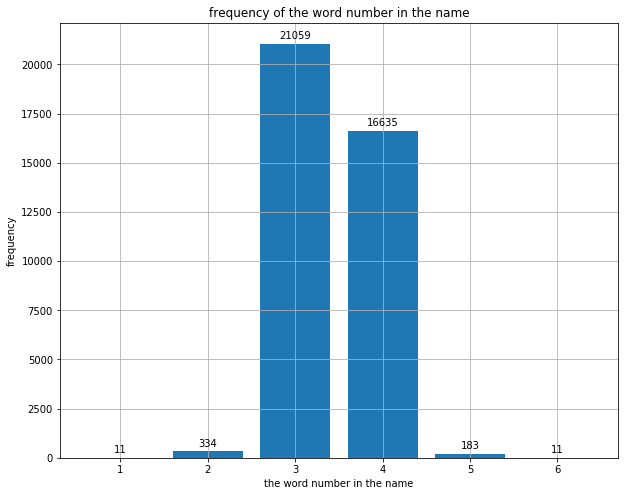

In [11]:
# target count
fig, ax = plt.subplots(figsize=(10, 8))
rects = ax.bar(df_word_num.word_number, df_word_num.count_word)
plt.xlabel('the word number in the name')
plt.ylabel('frequency')
plt.title('frequency of the word number in the name')
def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{0}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
autolabel(rects)

plt.grid()
plt.show()# save sparse matrix
joblib.dump(classifier, 'logistic_BOW_logistic.pkl')

In [12]:
df_data[df_data.count_word == 1]

,name,Gender,count_word
3739,nhi,female,1
3772,thaûo,female,1
3787,mai,female,1
3801,khaûi,male,1
3812,giang,female,1
3901,lộc,male,1
3990,ninh,male,1
4293,laâm,male,1
4319,lan,female,1
12891,sayróh,female,1


In [13]:
print(df_data.shape)
df_data = df_data[df_data.count_word != 1]
print(df_data.shape)

(38233, 3)
(38222, 3)


In [14]:
df_data[df_data.count_word == 6]

,name,Gender,count_word
5234,lê hoàng nam mỹ bảo anh,male,6
10166,trần võ thị hoàng minh phụng,female,6
10695,trần ngọc mai nguyễn như tâm,female,6
17959,nguyễn hồ tôn nữ thuận thiên,female,6
23806,ap doul ra kim nhã huy,male,6
25465,tạ thị kiều mai thúy ân,female,6
28377,trần nguyễn ngũ phúc kiều diễm,female,6
28401,"liu, xin yue (lưu tâm duyệt)",female,6
33977,việt nữ tân nguyên hạnh phúc,female,6
34533,nguyễn bá ngọc anh quang trường,male,6


In [15]:
# process the name contain 2 words
df_name_2 = df_data[df_data.count_word == 2]
ls_error_name = []
for i in range(len(list(df_name_2.name.values))):
    name_excess = [1, 8, 10, 21, 29, 42, 47, 50, 54, 63, 66, 76, 77, 80, 82, 83, 
              89, 90, 92, 95, 96, 97, 98, 99, 104, 134, 135, 137, 139, 147, 150, 155, 
               168, 172, 190, 250, 257, 259, 262, 290, 294]
    if i in name_excess:
        print('{0}:{1}'.format(i, list(df_name_2.name.values)[i]))
        ls_error_name.append(list(df_name_2.name.values)[i])

1:ksơr thách
8:ya chuẩn
10:ka hỏi
21:lim thida
29:komatsu susumu
42:lee shiying
47:vaên quaûng
50:khaùnh long
54:hoaøng sôn
63:thieän haäu
66:mohan kumar
76:tuaán phaùt
77:vaên sinh
80:phöông hoàng
82:patrick looram
83:anh luaân
89:brett ashton
90:ñöùc hoøa
92:ñöùc cam
95:ngoïc thaønh
96:vieät haûi
97:theá kieät
98:quoác phuøng
99:kimi kan
104:vaên kieän
134:nurul ashykin
135:umar nakash
137:ah reza
139:felix tjai
147:minami nakada
150:rusi lah
155:mohamach aly
168:oh hankil
172:duso sakirin
190:annie luo
250:lee youjin
257:yasser arafat
259:h'graih bdap
262:zahroh amine
290:abdul azit
294:zaki rah


In [16]:
df_name_2 = df_name_2[~df_name_2.isin(ls_error_name)]

In [17]:
df_name_2 = df_name_2.dropna()
df_name_2.shape

(293, 3)

In [18]:
df_data = df_data[df_data.count_word != 2]
df_data.shape

(37888, 3)

In [19]:
df_data = pd.concat([df_data, df_name_2], axis= 0)
df_data.shape

(38181, 3)

In [20]:
def preprocessing_name(name):
    '''
    preprocessing text: remove the excess character in the name
    '''
    text = name.lower()
    ls_error_key = ['~', '`', '!', '@', '#', '%', '$', '^', '&', '*', '(', ')', '_', '+', 
                    '<', '>', '?', ':', '"', '{', '}', ',', '.', ';', '=', '-', '0', '1', 
                    '2', '3', '4', '5', '6', '7', '8', '9']
    for key in ls_error_key:
        if key in text:
            text = text.replace(key, ' ')
    text = re.sub('\s+', ' ', text)
    return text.strip()
df_data['name'] = df_data['name'].apply(preprocessing_name)

In [21]:
df_data = df_data.dropna()

In [22]:
def remove_house_name(text):
    '''
    remove the house name in the name
    '''
    ls_text = text.split()
    if len(ls_text) > 2:
        ls_text = ls_text[1:]
        name = " ".join(ls_text)
        return name.strip()
    else:
        return text
df_data['name_1'] = df_data['name'].apply(remove_house_name)

In [23]:
df_data.head(2)

,name,Gender,count_word,name_1
0,nguyễn dương ngọc thùy dung,female,5,dương ngọc thùy dung
1,trần thị ngọc diệu,female,4,thị ngọc diệu


In [24]:
# custom function for ngram generator
def generate_ngrams(text, n_gram= 2):
    token = text.split()
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    #print(ngrams)
    return "|".join([" ".join(ngram) for ngram in ngrams])

df_data['name_biggram'] = df_data['name_1'].apply(generate_ngrams)

In [25]:
df_data.head(2)

,name,Gender,count_word,name_1,name_biggram
0,nguyễn dương ngọc thùy dung,female,5,dương ngọc thùy dung,dương ngọc|ngọc thùy|thùy dung
1,trần thị ngọc diệu,female,4,thị ngọc diệu,thị ngọc|ngọc diệu


In [26]:
ls_biggram = ("|".join(list(df_data.name_biggram.values))).split('|')

In [27]:
df_big = pd.DataFrame()
df_big['name_big'] = ls_biggram
df_biggram  = df_big.name_big.value_counts().to_frame()
df_biggram = df_biggram.reset_index()
df_biggram.columns = ['name_biggram', 'count_big']

In [28]:
df_biggram.head(2)

,name_biggram,count_big
0,thị thanh,461
1,thị ngọc,460


In [29]:
# plt.figure(figsize= (15,25))
# plt.title('top most popular biggram in the names')
# plt.barh(np.array(df_biggram[df_biggram.count_big >= 50].index), np.array(df_biggram[df_biggram.count_big >= 50].count_big), align= "center", alpha= 0.4)
# plt.yticks(df_biggram[df_biggram.count_big >= 50].index, df_biggram[df_biggram.count_big >= 50].name_biggram, fontsize= 10)
# plt.xlabel('frequency')
# plt.ylabel('biggram')
# plt.grid()
# plt.show()

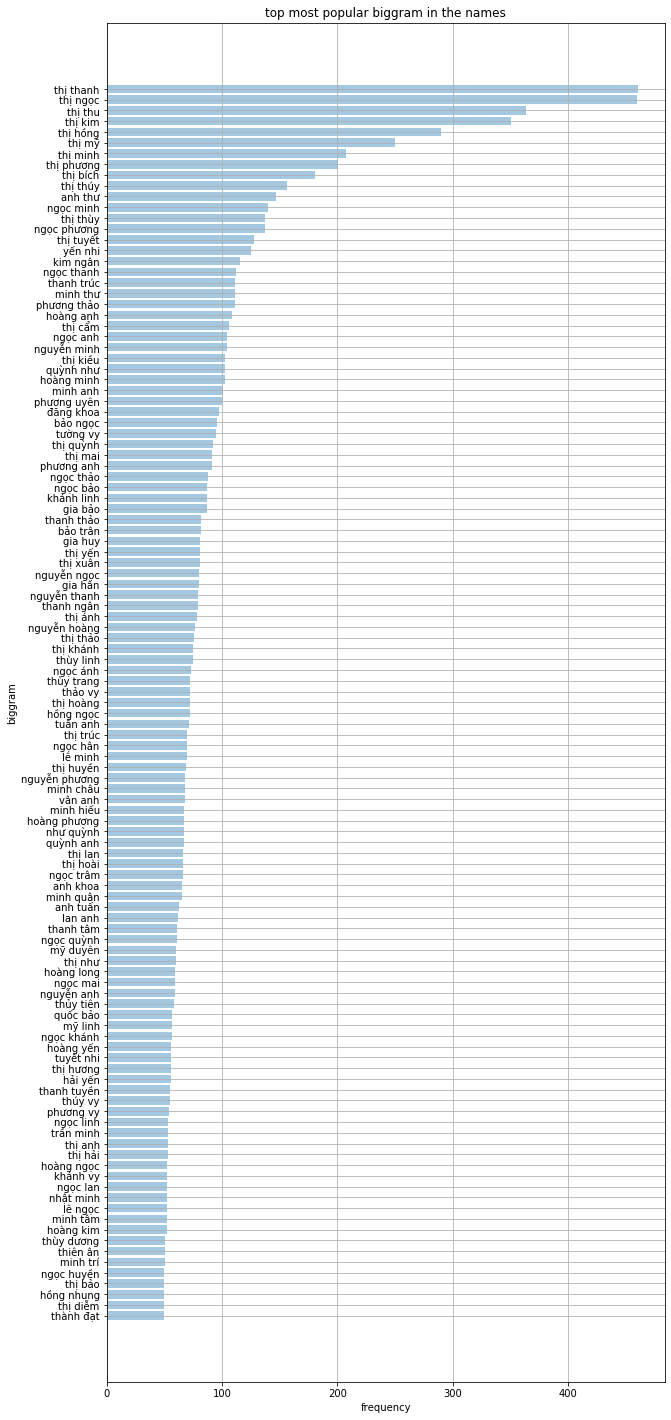

In [30]:
# top most popular biggram in the names
df0 = df_biggram[df_biggram.count_big >= 50].iloc[::-1, :]
df0 = df0.reset_index()
df0 = df0.drop('index', axis= 1)

plt.figure(figsize= (10,25))
plt.barh(np.array(df0.index), np.array(df0.count_big), align= "center", alpha= 0.4)
plt.title('top most popular biggram in the names')
plt.yticks(df0.index, df0.name_biggram, fontsize= 10)
plt.xlabel('frequency')
plt.ylabel('biggram')
plt.grid()
plt.show()

In [31]:
df_popular_biggram = df_biggram[df_biggram.count_big >= 50]
df_popular_biggram.head(1)

,name_biggram,count_big
0,thị thanh,461


In [32]:
ls_popular_biggram = list(df_popular_biggram.name_biggram.values)

In [33]:
def take_popular_biggram(text):
    ls_text = (text.strip()).split('|')
    ls_text = [i.strip() for i in ls_text if i != '']
    ls_big = []
    for big in ls_text:
        if big in ls_popular_biggram:
            ls_big.append(big)
    ls_big = [i.strip() for i in ls_big if i!= '']
    return "|".join(ls_big)
df_data['popular_biggram'] = df_data.name_biggram.apply(take_popular_biggram)

In [34]:
df_data = df_data.reset_index()
df_data = df_data.drop('index', axis = 1)

In [35]:
def convert_biggram_in_name(name, popular_bigram):
    #print('name start: ', name)
    name = (name.lower()).strip()
    ls_biggram = (popular_bigram.strip()).split('|')
    ls_biggram = [i.strip() for i in ls_biggram if i != '']
    if len(ls_biggram) == 1:
        for big in ls_biggram:
            if big in name:
                #print(big)
                norm_big = big.replace(' ', '_')
                name_n = re.sub(big, norm_big, name)
                break
    elif len(ls_biggram) > 1:
        for big in ls_biggram:
            if big in name:
                #print(big)
                norm_big = big.replace(' ', '_')
                name_n = re.sub(big, norm_big, name)
    else:
        name_n = name
    #print('name end: ',name_n)
    return name_n            

In [36]:
for i in range(df_data.shape[0]):
    print( i)
    df_data.loc[i, 'name_final'] = convert_biggram_in_name(df_data.loc[i, 'name_1'], df_data.loc[i, 'popular_biggram'])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164


3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955
3956
3957
3958
3959
3960
3961
3962
3963
3964
3965
3966
3967
3968
3969
3970
3971
3972
3973
3974
3975
3976
3977
3978
3979
3980
3981
3982
3983
3984
3985
3986
3987
3988
3989
3990
3991
3992
3993
3994
3995
3996
3997
3998
3999
4000
4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079


5756
5757
5758
5759
5760
5761
5762
5763
5764
5765
5766
5767
5768
5769
5770
5771
5772
5773
5774
5775
5776
5777
5778
5779
5780
5781
5782
5783
5784
5785
5786
5787
5788
5789
5790
5791
5792
5793
5794
5795
5796
5797
5798
5799
5800
5801
5802
5803
5804
5805
5806
5807
5808
5809
5810
5811
5812
5813
5814
5815
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836
5837
5838
5839
5840
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850
5851
5852
5853
5854
5855
5856
5857
5858
5859
5860
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
5873
5874
5875
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887
5888
5889
5890
5891
5892
5893
5894
5895
5896
5897
5898
5899
5900
5901
5902
5903
5904
5905
5906
5907
5908
5909
5910
5911
5912
5913
5914
5915
5916
5917
5918
5919
5920
5921
5922
5923
5924
5925
5926
5927
5928
5929
5930
5931
5932
5933
5934
5935
5936
5937
5938
5939
5940
5941
5942
5943
5944
5945
5946
5947
5948
5949
5950
5951
5952
5953
5954
5955


7444
7445
7446
7447
7448
7449
7450
7451
7452
7453
7454
7455
7456
7457
7458
7459
7460
7461
7462
7463
7464
7465
7466
7467
7468
7469
7470
7471
7472
7473
7474
7475
7476
7477
7478
7479
7480
7481
7482
7483
7484
7485
7486
7487
7488
7489
7490
7491
7492
7493
7494
7495
7496
7497
7498
7499
7500
7501
7502
7503
7504
7505
7506
7507
7508
7509
7510
7511
7512
7513
7514
7515
7516
7517
7518
7519
7520
7521
7522
7523
7524
7525
7526
7527
7528
7529
7530
7531
7532
7533
7534
7535
7536
7537
7538
7539
7540
7541
7542
7543
7544
7545
7546
7547
7548
7549
7550
7551
7552
7553
7554
7555
7556
7557
7558
7559
7560
7561
7562
7563
7564
7565
7566
7567
7568
7569
7570
7571
7572
7573
7574
7575
7576
7577
7578
7579
7580
7581
7582
7583
7584
7585
7586
7587
7588
7589
7590
7591
7592
7593
7594
7595
7596
7597
7598
7599
7600
7601
7602
7603
7604
7605
7606
7607
7608
7609
7610
7611
7612
7613
7614
7615
7616
7617
7618
7619
7620
7621
7622
7623
7624
7625
7626
7627
7628
7629
7630
7631
7632
7633
7634
7635
7636
7637
7638
7639
7640
7641
7642
7643


9590
9591
9592
9593
9594
9595
9596
9597
9598
9599
9600
9601
9602
9603
9604
9605
9606
9607
9608
9609
9610
9611
9612
9613
9614
9615
9616
9617
9618
9619
9620
9621
9622
9623
9624
9625
9626
9627
9628
9629
9630
9631
9632
9633
9634
9635
9636
9637
9638
9639
9640
9641
9642
9643
9644
9645
9646
9647
9648
9649
9650
9651
9652
9653
9654
9655
9656
9657
9658
9659
9660
9661
9662
9663
9664
9665
9666
9667
9668
9669
9670
9671
9672
9673
9674
9675
9676
9677
9678
9679
9680
9681
9682
9683
9684
9685
9686
9687
9688
9689
9690
9691
9692
9693
9694
9695
9696
9697
9698
9699
9700
9701
9702
9703
9704
9705
9706
9707
9708
9709
9710
9711
9712
9713
9714
9715
9716
9717
9718
9719
9720
9721
9722
9723
9724
9725
9726
9727
9728
9729
9730
9731
9732
9733
9734
9735
9736
9737
9738
9739
9740
9741
9742
9743
9744
9745
9746
9747
9748
9749
9750
9751
9752
9753
9754
9755
9756
9757
9758
9759
9760
9761
9762
9763
9764
9765
9766
9767
9768
9769
9770
9771
9772
9773
9774
9775
9776
9777
9778
9779
9780
9781
9782
9783
9784
9785
9786
9787
9788
9789


11186
11187
11188
11189
11190
11191
11192
11193
11194
11195
11196
11197
11198
11199
11200
11201
11202
11203
11204
11205
11206
11207
11208
11209
11210
11211
11212
11213
11214
11215
11216
11217
11218
11219
11220
11221
11222
11223
11224
11225
11226
11227
11228
11229
11230
11231
11232
11233
11234
11235
11236
11237
11238
11239
11240
11241
11242
11243
11244
11245
11246
11247
11248
11249
11250
11251
11252
11253
11254
11255
11256
11257
11258
11259
11260
11261
11262
11263
11264
11265
11266
11267
11268
11269
11270
11271
11272
11273
11274
11275
11276
11277
11278
11279
11280
11281
11282
11283
11284
11285
11286
11287
11288
11289
11290
11291
11292
11293
11294
11295
11296
11297
11298
11299
11300
11301
11302
11303
11304
11305
11306
11307
11308
11309
11310
11311
11312
11313
11314
11315
11316
11317
11318
11319
11320
11321
11322
11323
11324
11325
11326
11327
11328
11329
11330
11331
11332
11333
11334
11335
11336
11337
11338
11339
11340
11341
11342
11343
11344
11345
11346
11347
11348
11349
11350
11351
1135

12803
12804
12805
12806
12807
12808
12809
12810
12811
12812
12813
12814
12815
12816
12817
12818
12819
12820
12821
12822
12823
12824
12825
12826
12827
12828
12829
12830
12831
12832
12833
12834
12835
12836
12837
12838
12839
12840
12841
12842
12843
12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
12968
1296

14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
14320
14321
14322
14323
14324
14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
14335
14336
14337
14338
14339
14340
14341
14342
14343
14344
14345
14346
14347
14348
14349
14350
14351
14352
14353
14354
14355
14356
14357
14358
14359
14360
14361
14362
14363
14364
14365
14366
14367
14368
14369
14370
14371
14372
14373
14374
14375
14376
14377
14378
14379
14380
14381
14382
14383
14384
14385
14386
14387
14388
14389
14390
14391
14392
14393
14394
14395
14396
14397
14398
14399
14400
14401
14402
14403
14404
14405
14406
14407
14408
14409
14410
14411
1441

15824
15825
15826
15827
15828
15829
15830
15831
15832
15833
15834
15835
15836
15837
15838
15839
15840
15841
15842
15843
15844
15845
15846
15847
15848
15849
15850
15851
15852
15853
15854
15855
15856
15857
15858
15859
15860
15861
15862
15863
15864
15865
15866
15867
15868
15869
15870
15871
15872
15873
15874
15875
15876
15877
15878
15879
15880
15881
15882
15883
15884
15885
15886
15887
15888
15889
15890
15891
15892
15893
15894
15895
15896
15897
15898
15899
15900
15901
15902
15903
15904
15905
15906
15907
15908
15909
15910
15911
15912
15913
15914
15915
15916
15917
15918
15919
15920
15921
15922
15923
15924
15925
15926
15927
15928
15929
15930
15931
15932
15933
15934
15935
15936
15937
15938
15939
15940
15941
15942
15943
15944
15945
15946
15947
15948
15949
15950
15951
15952
15953
15954
15955
15956
15957
15958
15959
15960
15961
15962
15963
15964
15965
15966
15967
15968
15969
15970
15971
15972
15973
15974
15975
15976
15977
15978
15979
15980
15981
15982
15983
15984
15985
15986
15987
15988
15989
1599

17193
17194
17195
17196
17197
17198
17199
17200
17201
17202
17203
17204
17205
17206
17207
17208
17209
17210
17211
17212
17213
17214
17215
17216
17217
17218
17219
17220
17221
17222
17223
17224
17225
17226
17227
17228
17229
17230
17231
17232
17233
17234
17235
17236
17237
17238
17239
17240
17241
17242
17243
17244
17245
17246
17247
17248
17249
17250
17251
17252
17253
17254
17255
17256
17257
17258
17259
17260
17261
17262
17263
17264
17265
17266
17267
17268
17269
17270
17271
17272
17273
17274
17275
17276
17277
17278
17279
17280
17281
17282
17283
17284
17285
17286
17287
17288
17289
17290
17291
17292
17293
17294
17295
17296
17297
17298
17299
17300
17301
17302
17303
17304
17305
17306
17307
17308
17309
17310
17311
17312
17313
17314
17315
17316
17317
17318
17319
17320
17321
17322
17323
17324
17325
17326
17327
17328
17329
17330
17331
17332
17333
17334
17335
17336
17337
17338
17339
17340
17341
17342
17343
17344
17345
17346
17347
17348
17349
17350
17351
17352
17353
17354
17355
17356
17357
17358
1735

19183
19184
19185
19186
19187
19188
19189
19190
19191
19192
19193
19194
19195
19196
19197
19198
19199
19200
19201
19202
19203
19204
19205
19206
19207
19208
19209
19210
19211
19212
19213
19214
19215
19216
19217
19218
19219
19220
19221
19222
19223
19224
19225
19226
19227
19228
19229
19230
19231
19232
19233
19234
19235
19236
19237
19238
19239
19240
19241
19242
19243
19244
19245
19246
19247
19248
19249
19250
19251
19252
19253
19254
19255
19256
19257
19258
19259
19260
19261
19262
19263
19264
19265
19266
19267
19268
19269
19270
19271
19272
19273
19274
19275
19276
19277
19278
19279
19280
19281
19282
19283
19284
19285
19286
19287
19288
19289
19290
19291
19292
19293
19294
19295
19296
19297
19298
19299
19300
19301
19302
19303
19304
19305
19306
19307
19308
19309
19310
19311
19312
19313
19314
19315
19316
19317
19318
19319
19320
19321
19322
19323
19324
19325
19326
19327
19328
19329
19330
19331
19332
19333
19334
19335
19336
19337
19338
19339
19340
19341
19342
19343
19344
19345
19346
19347
19348
1934

20681
20682
20683
20684
20685
20686
20687
20688
20689
20690
20691
20692
20693
20694
20695
20696
20697
20698
20699
20700
20701
20702
20703
20704
20705
20706
20707
20708
20709
20710
20711
20712
20713
20714
20715
20716
20717
20718
20719
20720
20721
20722
20723
20724
20725
20726
20727
20728
20729
20730
20731
20732
20733
20734
20735
20736
20737
20738
20739
20740
20741
20742
20743
20744
20745
20746
20747
20748
20749
20750
20751
20752
20753
20754
20755
20756
20757
20758
20759
20760
20761
20762
20763
20764
20765
20766
20767
20768
20769
20770
20771
20772
20773
20774
20775
20776
20777
20778
20779
20780
20781
20782
20783
20784
20785
20786
20787
20788
20789
20790
20791
20792
20793
20794
20795
20796
20797
20798
20799
20800
20801
20802
20803
20804
20805
20806
20807
20808
20809
20810
20811
20812
20813
20814
20815
20816
20817
20818
20819
20820
20821
20822
20823
20824
20825
20826
20827
20828
20829
20830
20831
20832
20833
20834
20835
20836
20837
20838
20839
20840
20841
20842
20843
20844
20845
20846
2084

22170
22171
22172
22173
22174
22175
22176
22177
22178
22179
22180
22181
22182
22183
22184
22185
22186
22187
22188
22189
22190
22191
22192
22193
22194
22195
22196
22197
22198
22199
22200
22201
22202
22203
22204
22205
22206
22207
22208
22209
22210
22211
22212
22213
22214
22215
22216
22217
22218
22219
22220
22221
22222
22223
22224
22225
22226
22227
22228
22229
22230
22231
22232
22233
22234
22235
22236
22237
22238
22239
22240
22241
22242
22243
22244
22245
22246
22247
22248
22249
22250
22251
22252
22253
22254
22255
22256
22257
22258
22259
22260
22261
22262
22263
22264
22265
22266
22267
22268
22269
22270
22271
22272
22273
22274
22275
22276
22277
22278
22279
22280
22281
22282
22283
22284
22285
22286
22287
22288
22289
22290
22291
22292
22293
22294
22295
22296
22297
22298
22299
22300
22301
22302
22303
22304
22305
22306
22307
22308
22309
22310
22311
22312
22313
22314
22315
22316
22317
22318
22319
22320
22321
22322
22323
22324
22325
22326
22327
22328
22329
22330
22331
22332
22333
22334
22335
2233

23776
23777
23778
23779
23780
23781
23782
23783
23784
23785
23786
23787
23788
23789
23790
23791
23792
23793
23794
23795
23796
23797
23798
23799
23800
23801
23802
23803
23804
23805
23806
23807
23808
23809
23810
23811
23812
23813
23814
23815
23816
23817
23818
23819
23820
23821
23822
23823
23824
23825
23826
23827
23828
23829
23830
23831
23832
23833
23834
23835
23836
23837
23838
23839
23840
23841
23842
23843
23844
23845
23846
23847
23848
23849
23850
23851
23852
23853
23854
23855
23856
23857
23858
23859
23860
23861
23862
23863
23864
23865
23866
23867
23868
23869
23870
23871
23872
23873
23874
23875
23876
23877
23878
23879
23880
23881
23882
23883
23884
23885
23886
23887
23888
23889
23890
23891
23892
23893
23894
23895
23896
23897
23898
23899
23900
23901
23902
23903
23904
23905
23906
23907
23908
23909
23910
23911
23912
23913
23914
23915
23916
23917
23918
23919
23920
23921
23922
23923
23924
23925
23926
23927
23928
23929
23930
23931
23932
23933
23934
23935
23936
23937
23938
23939
23940
23941
2394

25674
25675
25676
25677
25678
25679
25680
25681
25682
25683
25684
25685
25686
25687
25688
25689
25690
25691
25692
25693
25694
25695
25696
25697
25698
25699
25700
25701
25702
25703
25704
25705
25706
25707
25708
25709
25710
25711
25712
25713
25714
25715
25716
25717
25718
25719
25720
25721
25722
25723
25724
25725
25726
25727
25728
25729
25730
25731
25732
25733
25734
25735
25736
25737
25738
25739
25740
25741
25742
25743
25744
25745
25746
25747
25748
25749
25750
25751
25752
25753
25754
25755
25756
25757
25758
25759
25760
25761
25762
25763
25764
25765
25766
25767
25768
25769
25770
25771
25772
25773
25774
25775
25776
25777
25778
25779
25780
25781
25782
25783
25784
25785
25786
25787
25788
25789
25790
25791
25792
25793
25794
25795
25796
25797
25798
25799
25800
25801
25802
25803
25804
25805
25806
25807
25808
25809
25810
25811
25812
25813
25814
25815
25816
25817
25818
25819
25820
25821
25822
25823
25824
25825
25826
25827
25828
25829
25830
25831
25832
25833
25834
25835
25836
25837
25838
25839
2584

27363
27364
27365
27366
27367
27368
27369
27370
27371
27372
27373
27374
27375
27376
27377
27378
27379
27380
27381
27382
27383
27384
27385
27386
27387
27388
27389
27390
27391
27392
27393
27394
27395
27396
27397
27398
27399
27400
27401
27402
27403
27404
27405
27406
27407
27408
27409
27410
27411
27412
27413
27414
27415
27416
27417
27418
27419
27420
27421
27422
27423
27424
27425
27426
27427
27428
27429
27430
27431
27432
27433
27434
27435
27436
27437
27438
27439
27440
27441
27442
27443
27444
27445
27446
27447
27448
27449
27450
27451
27452
27453
27454
27455
27456
27457
27458
27459
27460
27461
27462
27463
27464
27465
27466
27467
27468
27469
27470
27471
27472
27473
27474
27475
27476
27477
27478
27479
27480
27481
27482
27483
27484
27485
27486
27487
27488
27489
27490
27491
27492
27493
27494
27495
27496
27497
27498
27499
27500
27501
27502
27503
27504
27505
27506
27507
27508
27509
27510
27511
27512
27513
27514
27515
27516
27517
27518
27519
27520
27521
27522
27523
27524
27525
27526
27527
27528
2752

28796
28797
28798
28799
28800
28801
28802
28803
28804
28805
28806
28807
28808
28809
28810
28811
28812
28813
28814
28815
28816
28817
28818
28819
28820
28821
28822
28823
28824
28825
28826
28827
28828
28829
28830
28831
28832
28833
28834
28835
28836
28837
28838
28839
28840
28841
28842
28843
28844
28845
28846
28847
28848
28849
28850
28851
28852
28853
28854
28855
28856
28857
28858
28859
28860
28861
28862
28863
28864
28865
28866
28867
28868
28869
28870
28871
28872
28873
28874
28875
28876
28877
28878
28879
28880
28881
28882
28883
28884
28885
28886
28887
28888
28889
28890
28891
28892
28893
28894
28895
28896
28897
28898
28899
28900
28901
28902
28903
28904
28905
28906
28907
28908
28909
28910
28911
28912
28913
28914
28915
28916
28917
28918
28919
28920
28921
28922
28923
28924
28925
28926
28927
28928
28929
28930
28931
28932
28933
28934
28935
28936
28937
28938
28939
28940
28941
28942
28943
28944
28945
28946
28947
28948
28949
28950
28951
28952
28953
28954
28955
28956
28957
28958
28959
28960
28961
2896

30677
30678
30679
30680
30681
30682
30683
30684
30685
30686
30687
30688
30689
30690
30691
30692
30693
30694
30695
30696
30697
30698
30699
30700
30701
30702
30703
30704
30705
30706
30707
30708
30709
30710
30711
30712
30713
30714
30715
30716
30717
30718
30719
30720
30721
30722
30723
30724
30725
30726
30727
30728
30729
30730
30731
30732
30733
30734
30735
30736
30737
30738
30739
30740
30741
30742
30743
30744
30745
30746
30747
30748
30749
30750
30751
30752
30753
30754
30755
30756
30757
30758
30759
30760
30761
30762
30763
30764
30765
30766
30767
30768
30769
30770
30771
30772
30773
30774
30775
30776
30777
30778
30779
30780
30781
30782
30783
30784
30785
30786
30787
30788
30789
30790
30791
30792
30793
30794
30795
30796
30797
30798
30799
30800
30801
30802
30803
30804
30805
30806
30807
30808
30809
30810
30811
30812
30813
30814
30815
30816
30817
30818
30819
30820
30821
30822
30823
30824
30825
30826
30827
30828
30829
30830
30831
30832
30833
30834
30835
30836
30837
30838
30839
30840
30841
30842
3084

32164
32165
32166
32167
32168
32169
32170
32171
32172
32173
32174
32175
32176
32177
32178
32179
32180
32181
32182
32183
32184
32185
32186
32187
32188
32189
32190
32191
32192
32193
32194
32195
32196
32197
32198
32199
32200
32201
32202
32203
32204
32205
32206
32207
32208
32209
32210
32211
32212
32213
32214
32215
32216
32217
32218
32219
32220
32221
32222
32223
32224
32225
32226
32227
32228
32229
32230
32231
32232
32233
32234
32235
32236
32237
32238
32239
32240
32241
32242
32243
32244
32245
32246
32247
32248
32249
32250
32251
32252
32253
32254
32255
32256
32257
32258
32259
32260
32261
32262
32263
32264
32265
32266
32267
32268
32269
32270
32271
32272
32273
32274
32275
32276
32277
32278
32279
32280
32281
32282
32283
32284
32285
32286
32287
32288
32289
32290
32291
32292
32293
32294
32295
32296
32297
32298
32299
32300
32301
32302
32303
32304
32305
32306
32307
32308
32309
32310
32311
32312
32313
32314
32315
32316
32317
32318
32319
32320
32321
32322
32323
32324
32325
32326
32327
32328
32329
3233

33671
33672
33673
33674
33675
33676
33677
33678
33679
33680
33681
33682
33683
33684
33685
33686
33687
33688
33689
33690
33691
33692
33693
33694
33695
33696
33697
33698
33699
33700
33701
33702
33703
33704
33705
33706
33707
33708
33709
33710
33711
33712
33713
33714
33715
33716
33717
33718
33719
33720
33721
33722
33723
33724
33725
33726
33727
33728
33729
33730
33731
33732
33733
33734
33735
33736
33737
33738
33739
33740
33741
33742
33743
33744
33745
33746
33747
33748
33749
33750
33751
33752
33753
33754
33755
33756
33757
33758
33759
33760
33761
33762
33763
33764
33765
33766
33767
33768
33769
33770
33771
33772
33773
33774
33775
33776
33777
33778
33779
33780
33781
33782
33783
33784
33785
33786
33787
33788
33789
33790
33791
33792
33793
33794
33795
33796
33797
33798
33799
33800
33801
33802
33803
33804
33805
33806
33807
33808
33809
33810
33811
33812
33813
33814
33815
33816
33817
33818
33819
33820
33821
33822
33823
33824
33825
33826
33827
33828
33829
33830
33831
33832
33833
33834
33835
33836
3383

35165
35166
35167
35168
35169
35170
35171
35172
35173
35174
35175
35176
35177
35178
35179
35180
35181
35182
35183
35184
35185
35186
35187
35188
35189
35190
35191
35192
35193
35194
35195
35196
35197
35198
35199
35200
35201
35202
35203
35204
35205
35206
35207
35208
35209
35210
35211
35212
35213
35214
35215
35216
35217
35218
35219
35220
35221
35222
35223
35224
35225
35226
35227
35228
35229
35230
35231
35232
35233
35234
35235
35236
35237
35238
35239
35240
35241
35242
35243
35244
35245
35246
35247
35248
35249
35250
35251
35252
35253
35254
35255
35256
35257
35258
35259
35260
35261
35262
35263
35264
35265
35266
35267
35268
35269
35270
35271
35272
35273
35274
35275
35276
35277
35278
35279
35280
35281
35282
35283
35284
35285
35286
35287
35288
35289
35290
35291
35292
35293
35294
35295
35296
35297
35298
35299
35300
35301
35302
35303
35304
35305
35306
35307
35308
35309
35310
35311
35312
35313
35314
35315
35316
35317
35318
35319
35320
35321
35322
35323
35324
35325
35326
35327
35328
35329
35330
3533

36761
36762
36763
36764
36765
36766
36767
36768
36769
36770
36771
36772
36773
36774
36775
36776
36777
36778
36779
36780
36781
36782
36783
36784
36785
36786
36787
36788
36789
36790
36791
36792
36793
36794
36795
36796
36797
36798
36799
36800
36801
36802
36803
36804
36805
36806
36807
36808
36809
36810
36811
36812
36813
36814
36815
36816
36817
36818
36819
36820
36821
36822
36823
36824
36825
36826
36827
36828
36829
36830
36831
36832
36833
36834
36835
36836
36837
36838
36839
36840
36841
36842
36843
36844
36845
36846
36847
36848
36849
36850
36851
36852
36853
36854
36855
36856
36857
36858
36859
36860
36861
36862
36863
36864
36865
36866
36867
36868
36869
36870
36871
36872
36873
36874
36875
36876
36877
36878
36879
36880
36881
36882
36883
36884
36885
36886
36887
36888
36889
36890
36891
36892
36893
36894
36895
36896
36897
36898
36899
36900
36901
36902
36903
36904
36905
36906
36907
36908
36909
36910
36911
36912
36913
36914
36915
36916
36917
36918
36919
36920
36921
36922
36923
36924
36925
36926
3692

In [37]:
df_data.columns

Index(['name', 'Gender', 'count_word', 'name_1', 'name_biggram',
       'popular_biggram', 'name_final'],
      dtype='object')

In [38]:
df_data = df_data.drop(['count_word', 'name_biggram', 'popular_biggram'], axis = 1)

In [39]:
df_data.head(2)

,name,Gender,name_1,name_final
0,nguyễn dương ngọc thùy dung,female,dương ngọc thùy dung,dương ngọc thùy dung
1,trần thị ngọc diệu,female,thị ngọc diệu,thị_ngọc diệu


# labelencoder

In [40]:
ls_gender = list(df_data.Gender.values)
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(ls_gender)

In [41]:
names = list(df_data.name_1.values)
name_train, name_test, y_train, y_test = train_test_split(names, y, test_size=0.2)

In [42]:
# here we will use again on the previous BOW (bag of word) model to vectorize the sentences
vectorizer = CountVectorizer()
vectorizer.fit(name_train)
X_train = vectorizer.transform(name_train)
X_test = vectorizer.transform(name_test)

In [43]:
# logistic
from sklearn.linear_model import LogisticRegression

In [44]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/home/anhnvh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
score = classifier.score(X_test, y_test)
print('Acuracy :', score)
y_prod = classifier.predict(X_test)
print(classification_report(y_pred = y_prod, y_true= y_test))

Acuracy : 0.9455283488280739
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      3868
           1       0.94      0.95      0.95      3769

   micro avg       0.95      0.95      0.95      7637
   macro avg       0.95      0.95      0.95      7637
weighted avg       0.95      0.95      0.95      7637



In [46]:
df_test = pd.DataFrame()
df_test['name'] = name_test
df_test['label'] = y_test
df_test['label_predict'] = y_prod

In [47]:
df_test.shape

(7637, 3)

In [48]:
df_test['count_word'] = df_test.name.apply(count_word)

In [49]:
df_test[df_test.label != df_test.label_predict].count_word.value_counts()

2    262
3    153
4      1
Name: count_word, dtype: int64

In [50]:
df_test[df_test.label != df_test.label_predict][df_test.count_word== 2]

/home/anhnvh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,name,label,label_predict,count_word
45,minh phụng,1,0,2
107,ngọc thủy,1,0,2
120,giai tú,0,1,2
129,thiên thoại,1,0,2
141,quí ngọc,0,1,2
156,ngọc cẩm,1,0,2
166,anh chiêu,1,0,2
171,hào phúc,0,1,2
207,lê uyễn,0,1,2
234,hoàng nguyên,0,1,2


In [51]:
# save sparse matrix
# joblib.dump(vectorizer, "vectorizer_bow")

In [52]:
# save model
joblib.dump(classifier, 'logistic_BOW_logistic.pkl')

In [55]:
import pickle
from sklearn.externals import joblib
def predict_gender(text):
    text = preprocessing_name(text)
    text = remove_house_name(text)
    # load feature text model
    vectorize = joblib.load('model/vectorizer_bow')
    vec_text = vectorize.transform([text])
    # load model
    model = joblib.load('model/logistic_BOW_logistic')
    y_pred = model.predict(vec_text)
    return y_pred[-1]

In [56]:
predict_gender('Vương Vũ Bảo Linh')

0

In [57]:
predict_gender('nguyễn vĩnh nam')

1

In [58]:
X_train

<30544x1152 sparse matrix of type '<class 'numpy.int64'>'
	with 74557 stored elements in Compressed Sparse Row format>

In [59]:
# Fitting Random Forest Classifier
# to the training set
from sklearn.ensemble import RandomForestClassifier

In [60]:
classifier = RandomForestClassifier(n_estimators = 100, criterion= 'entropy' )
classifier.fit( X_train , y_train )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [61]:
y_pred = classifier.predict(X_test)
print(classification_report(y_pred = y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      3868
           1       0.93      0.94      0.94      3769

   micro avg       0.94      0.94      0.94      7637
   macro avg       0.94      0.94      0.94      7637
weighted avg       0.94      0.94      0.94      7637



neural network

In [62]:
# activation function (sigmoid and relu)
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def relu(Z):
    return np.maximum(0,Z)

# derivative of activation function (sigmoid)
def sigmoid_backward(dA, Z):
    sig = sigmoid(Z)
    return dA * sig * (1 - sig)

def relu_backward(dA, Z):
    dZ = np.array(dA, copy = True)
    dZ[Z <= 0] = 0;
    return dZ;

In [63]:
class NeuralNetwork:
    def __init__(self, layers, alpha = 0.1):
        '''
        input:
        + layers (list) [n1, n2, n3, ..., n_output]
            the first layer (input layer) contain n1 neurons (input data demension)
            the second layer contain n2 neurons
            the third layer contain n3 neurons
            the last layers (output layer) contain n_ouput neurons
        + alpha (float)

        create
        + layers
        + W matrix contain the weight matrix between the layers
        + b matrix contain the bias vector
        + alpha
        '''
        self.layers = layers
        # learning rate
        self.alpha = alpha
        # the parameters matrix W, b
        self.W = []
        self.b = []
        # create the parameters for the each layer
        for  i in range(0, len(layers) - 1):
            # create matrix w , that is used connecting layer i and layer i+1. 
            #the size is (the neurons number of layer i) x (the neurons number of layer i+1)
            w_ = np.random.rand(layers[i], layers[i+1])
            # create vector b for the layer i+1
            # the elements is the neurons number of layer i+1
            b_ = np.zeros((layers[i+1], 1))
            self.W.append(w_)
            self.b.append(b_)
    # description neural model
    def __repr__(self):
        return "Neural network [{}]".format("-".join(str(l) for l in self.layers))
    
    # train model with data
    def fit_partial(self, x, y):
        A = [x]
        
        # feedforward
        out = A[-1]
        for i in range(0, len(self.layers)-1):
            out = sigmoid(np.dot(out, self.W[i]) + (self.b[i].T))
            A.append(out)
            
        # backpropagation
        y = y.reshape(-1, 1)
            # init compute derivative of loss function follow y_preditc (A): 
            # dL/d(y_predict)
        dA = [-(y/A[-1] - (1-y)/(1-A[-1]))]
        dW = []
        db = []
            # in the step backpropagation
            # we find W, b follow the result predict from output layer back to input layer
        for i in reversed(range(0, len(self.layers)- 1)):
            # dJ/d(W^l) = (A^{l-1}).T * (Y_predict - Y)
            dw_ = np.dot((A[i]).T, dA[-1]*sigmoid_derivative(A[i+1]))
            # dJ/d(b^l) = (sum(Y_predict - Y)).T
            db_ = (np.sum(dA[-1]*sigmoid_derivative(A[i+1]), 0)).reshape(-1, 1)
            # dJ/d(A^{l-1}) = (Y_predict - Y)*(W^l).T
            dA_ = np.dot(dA[-1]*sigmoid_derivative(A[i+1]), self.W[i].T)
            dW.append(dw_)
            db.append(db_)
            dA.append(dA_)
        # reverse dW, db
        dW = dW[::-1]
        db = db[::-1]

        # Gradient descent
        for i in range(0, len(self.layers)-1):
            self.W[i] = self.W[i] - self.alpha * dW[i]
            self.b[i] = self.b[i] - self.alpha * db[i]

    def fit(self, X, y, X_val, y_val, epochs=20, verbose=10):
        for epoch in range(0, epochs):
            self.fit_partial(X, y)
            if epoch % verbose == 0:
                loss = self.calculate_loss(X, y)
                loss_val = self.calculate_loss(X_val, y_val)
                print("Epoch {}, loss {}, loss_val {}".format(epoch, loss, loss_val))

    # Dự đoán
    def predict(self, X):
        for i in range(0, len(self.layers) - 1):
            X = sigmoid(np.dot(X, self.W[i]) + (self.b[i].T))
        return X

    # Tính loss function
    def calculate_loss(self, X, y):
        y_predict = self.predict(X)
        #return np.sum((y_predict-y)**2)/2
        return -(np.sum(y*np.log(y_predict) + (1-y)*np.log(1-y_predict)))    

In [64]:
# x_train, x_val, y_training, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1000)

In [65]:
# p = NeuralNetwork([X_train.shape[1], 134, 1])
# p.fit(x_train, y_training, x_val, y_val, 20, 10)

TF-IDF

In [66]:
ls_word = " ".join(name_train).split()
d = pd.DataFrame()
d['word'] = ls_word
d.word.value_counts().to_frame().head(2)

,word
thị,4977
ngọc,3134


word a level if-idf

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [68]:
# word level 
tfidf_vect = TfidfVectorizer(analyzer='word')
tfidf_vect.fit(name_train) # learn vocabulary and idf from training set
X_train_1 =  tfidf_vect.transform(name_train)
X_test_1 = tfidf_vect.transform(name_test)

In [69]:
# logistic
classifier = LogisticRegression()
classifier.fit(X_train_1, y_train)
score = classifier.score(X_test_1, y_test)
print('Acuracy :', score)
y_prod = classifier.predict(X_test_1)
print(classification_report(y_pred = y_prod, y_true= y_test))

Acuracy : 0.9434332853214613
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3868
           1       0.94      0.95      0.94      3769

   micro avg       0.94      0.94      0.94      7637
   macro avg       0.94      0.94      0.94      7637
weighted avg       0.94      0.94      0.94      7637



/home/anhnvh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [70]:
# random forest
classifier = RandomForestClassifier(n_estimators = 1000, criterion= 'entropy' )
classifier.fit( X_train_1 , y_train )
y_pred = classifier.predict(X_test_1)
print(classification_report(y_pred = y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3868
           1       0.94      0.94      0.94      3769

   micro avg       0.94      0.94      0.94      7637
   macro avg       0.94      0.94      0.94      7637
weighted avg       0.94      0.94      0.94      7637



# name_final

In [71]:
ls_gender = list(df_data.Gender.values)
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(ls_gender)

In [72]:
names_final = list(df_data.name_final.values)
name_train_final, name_test_final, y_train, y_test = train_test_split(names, y, test_size=0.2)

In [73]:
# here we will use again on the previous BOW (bag of word) model to vectorize the sentences
vectorizer = CountVectorizer()
vectorizer.fit(name_train_final)
X_train_final = vectorizer.transform(name_train_final)
X_test_final = vectorizer.transform(name_test_final)

In [74]:
X_train_final

<30544x1126 sparse matrix of type '<class 'numpy.int64'>'
	with 74515 stored elements in Compressed Sparse Row format>

In [75]:
classifier = LogisticRegression()
classifier.fit(X_train_final, y_train)
score = classifier.score(X_test_final, y_test)
print('Acuracy :', score)
y_prod = classifier.predict(X_test_final)
print(classification_report(y_pred = y_prod, y_true= y_test))

Acuracy : 0.9480162367421763
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      3818
           1       0.94      0.95      0.95      3819

   micro avg       0.95      0.95      0.95      7637
   macro avg       0.95      0.95      0.95      7637
weighted avg       0.95      0.95      0.95      7637



/home/anhnvh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [76]:
classifier = RandomForestClassifier(n_estimators = 500, criterion= 'entropy' )
classifier.fit( X_train_final , y_train )
y_pred = classifier.predict(X_test_final)
print(classification_report(y_pred = y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      3818
           1       0.93      0.94      0.94      3819

   micro avg       0.94      0.94      0.94      7637
   macro avg       0.94      0.94      0.94      7637
weighted avg       0.94      0.94      0.94      7637



In [77]:
# word level 
tfidf_vect = TfidfVectorizer(analyzer='word')
tfidf_vect.fit(name_train_final) # learn vocabulary and idf from training set
X_train_1 =  tfidf_vect.transform(name_train_final)
X_test_1 = tfidf_vect.transform(name_test_final)

In [78]:
# logistic
classifier = LogisticRegression()
classifier.fit(X_train_1, y_train)
score = classifier.score(X_test_1, y_test)
print('Acuracy :', score)
y_prod = classifier.predict(X_test_1)
print(classification_report(y_pred = y_prod, y_true= y_test))

Acuracy : 0.944218934136441
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3818
           1       0.94      0.95      0.94      3819

   micro avg       0.94      0.94      0.94      7637
   macro avg       0.94      0.94      0.94      7637
weighted avg       0.94      0.94      0.94      7637



/home/anhnvh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [79]:
# random forest
classifier = RandomForestClassifier(n_estimators = 1000, criterion= 'entropy' )
classifier.fit( X_train_1 , y_train )
y_pred = classifier.predict(X_test_1)
print(classification_report(y_pred = y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3818
           1       0.94      0.94      0.94      3819

   micro avg       0.94      0.94      0.94      7637
   macro avg       0.94      0.94      0.94      7637
weighted avg       0.94      0.94      0.94      7637

